In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df=pd.read_csv('resources/BaskinRobbins.csv')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
63,Vanilla Pomegranate Parfait Frozen Yogurt,140,5.0,0.1,20,14,3.0
28,Jamoca Almond Fudge,260,15.0,0.4,28,20,5.0
27,Icing on the Cake,320,18.0,0.4,36,28,4.0
54,Reese Peanut Butter Cup,180,11.0,0.3,17,14,4.0
52,Red Velvet,160,9.0,0.3,18,15,3.0
57,Salty Caramel,160,8.0,0.3,18,15,3.0
20,Cotton Candy,240,12.0,0.4,31,20,4.0
41,Peanut Butter ‘n Banana,180,12.0,0.3,15,11,4.0
10,Chocoholic’s Resolution,190,11.0,0.2,22,17,3.0
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


# Scikit-learn: Hierarchical Clustering

In [4]:
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch # draw dendrogram

In [5]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

In [7]:
pt = preprocessing.StandardScaler()
mat = pt.fit_transform(df[cols])
mat[:5].round(4)

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [8]:
X=pd.DataFrame(mat, columns=cols)
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.518194,-0.324811,-0.533530,-0.535844,-0.204771,-0.94002
1,-0.518194,-0.198073,-0.533530,-0.720618,-0.876675,-0.34019
2,-0.354799,-0.198073,0.158083,-0.351070,-0.428739,-0.34019
3,-1.171772,-0.831762,-1.225143,-1.090165,-0.204771,-0.34019
4,-1.008377,-1.085238,-1.225143,0.572799,0.691102,-0.94002


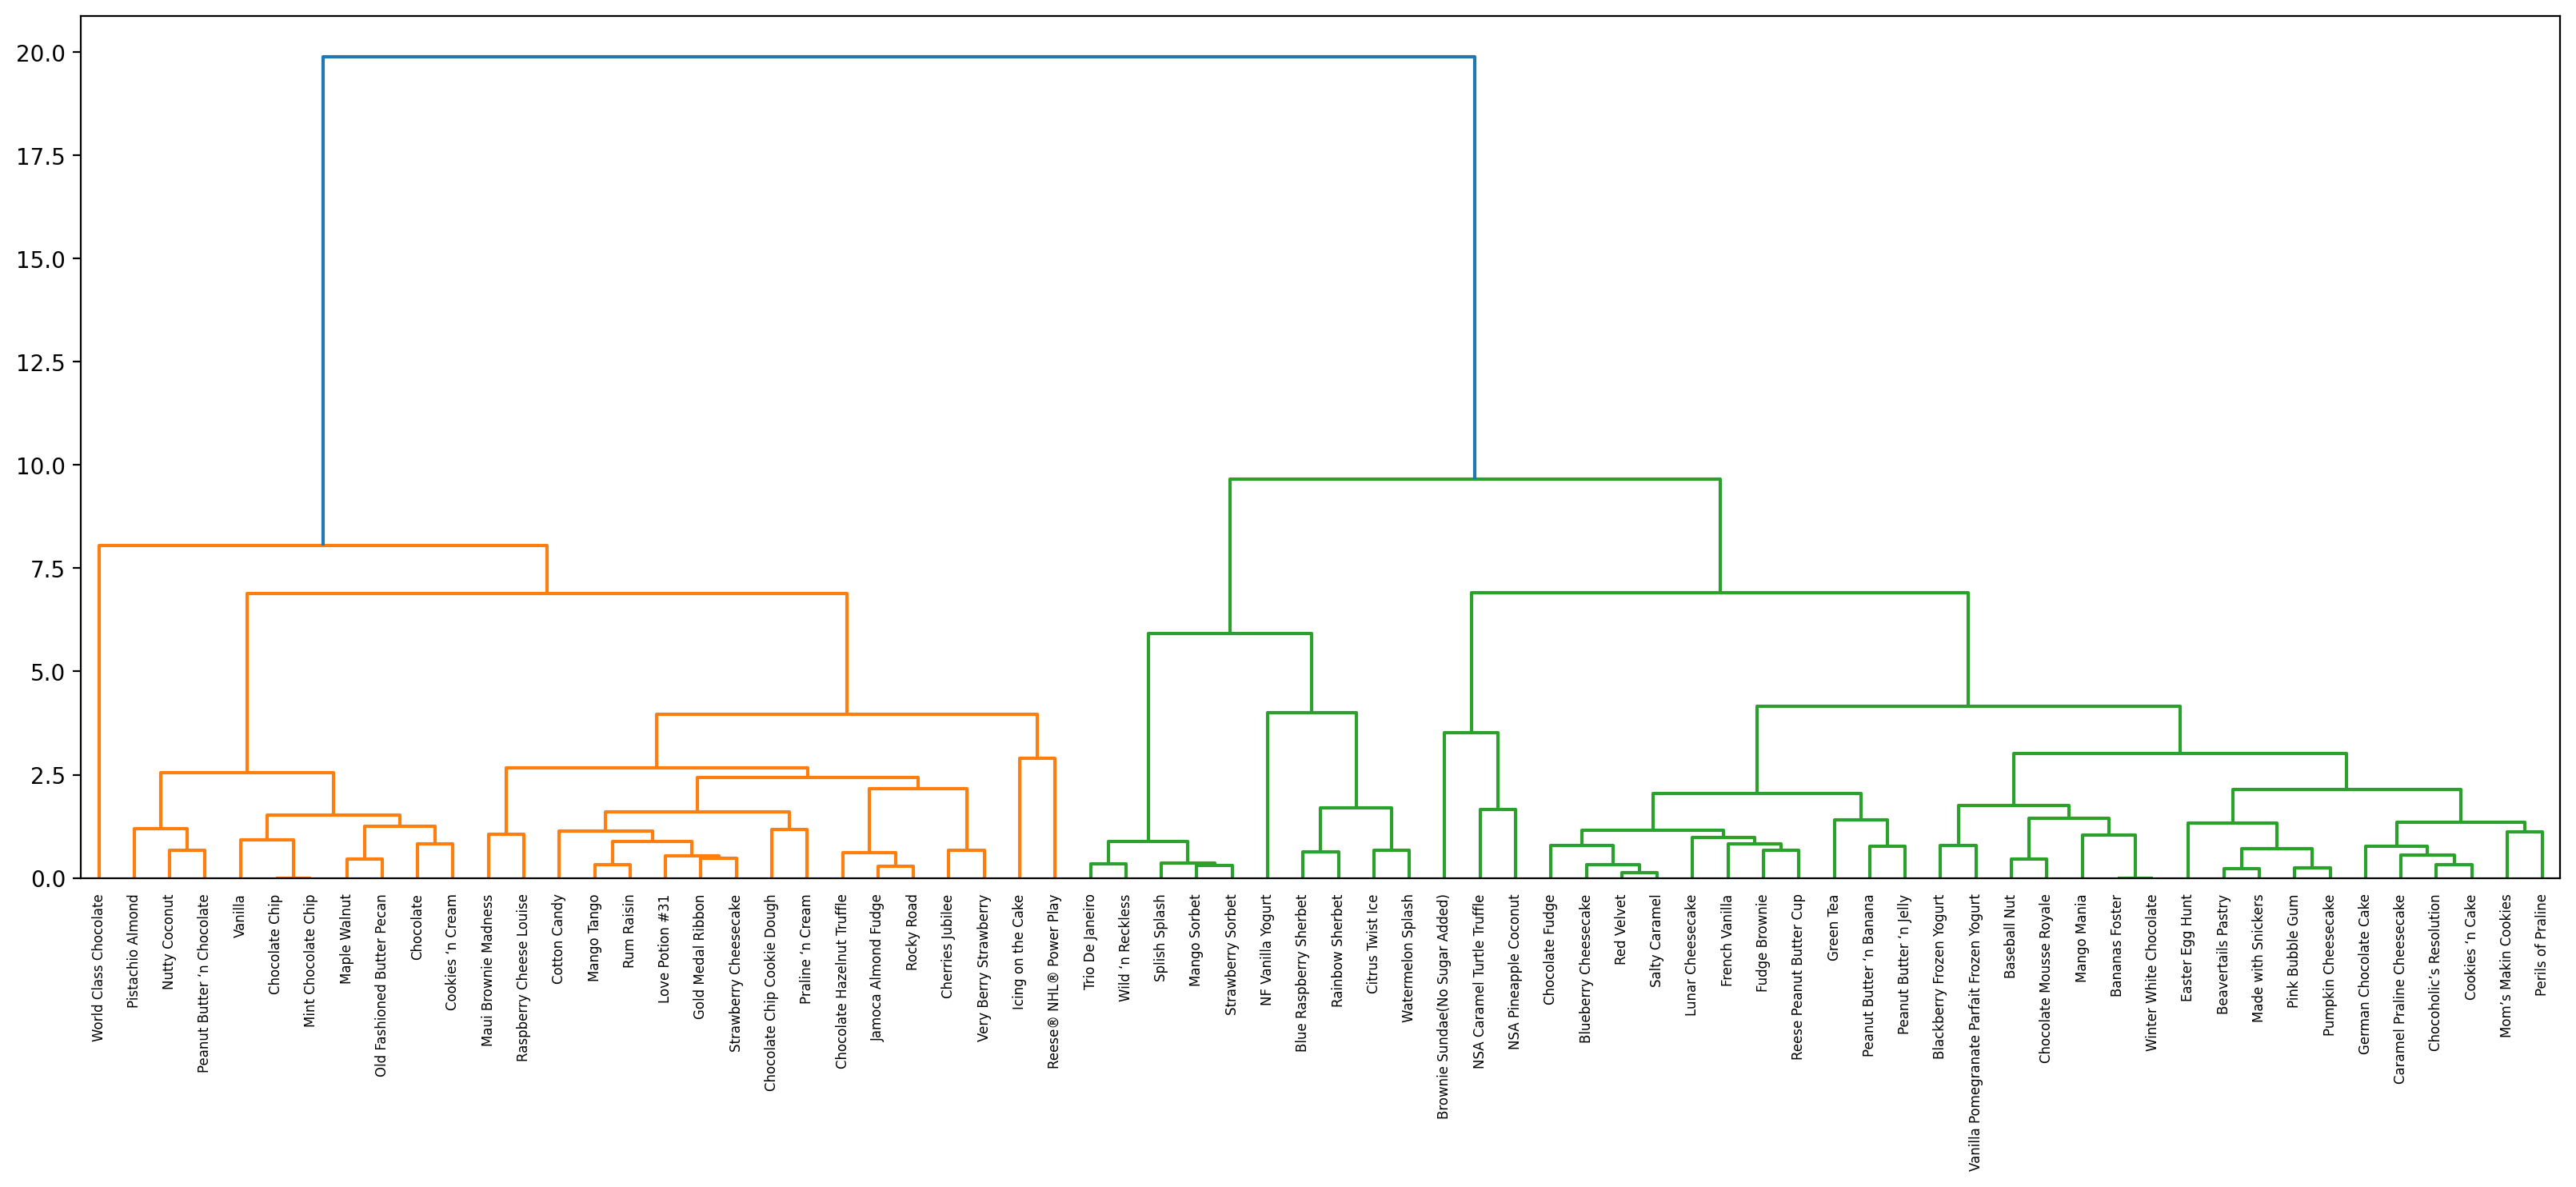

In [11]:
fig, ax=plt.subplots(figsize=(20, 7))
dg=sch.dendrogram(sch.linkage(X, method='ward'), ax=ax, labels=df['Flavour'].values)
# dg=sch.dendrogram(sch.linkage(df[cols], method='ward'), ax=ax)

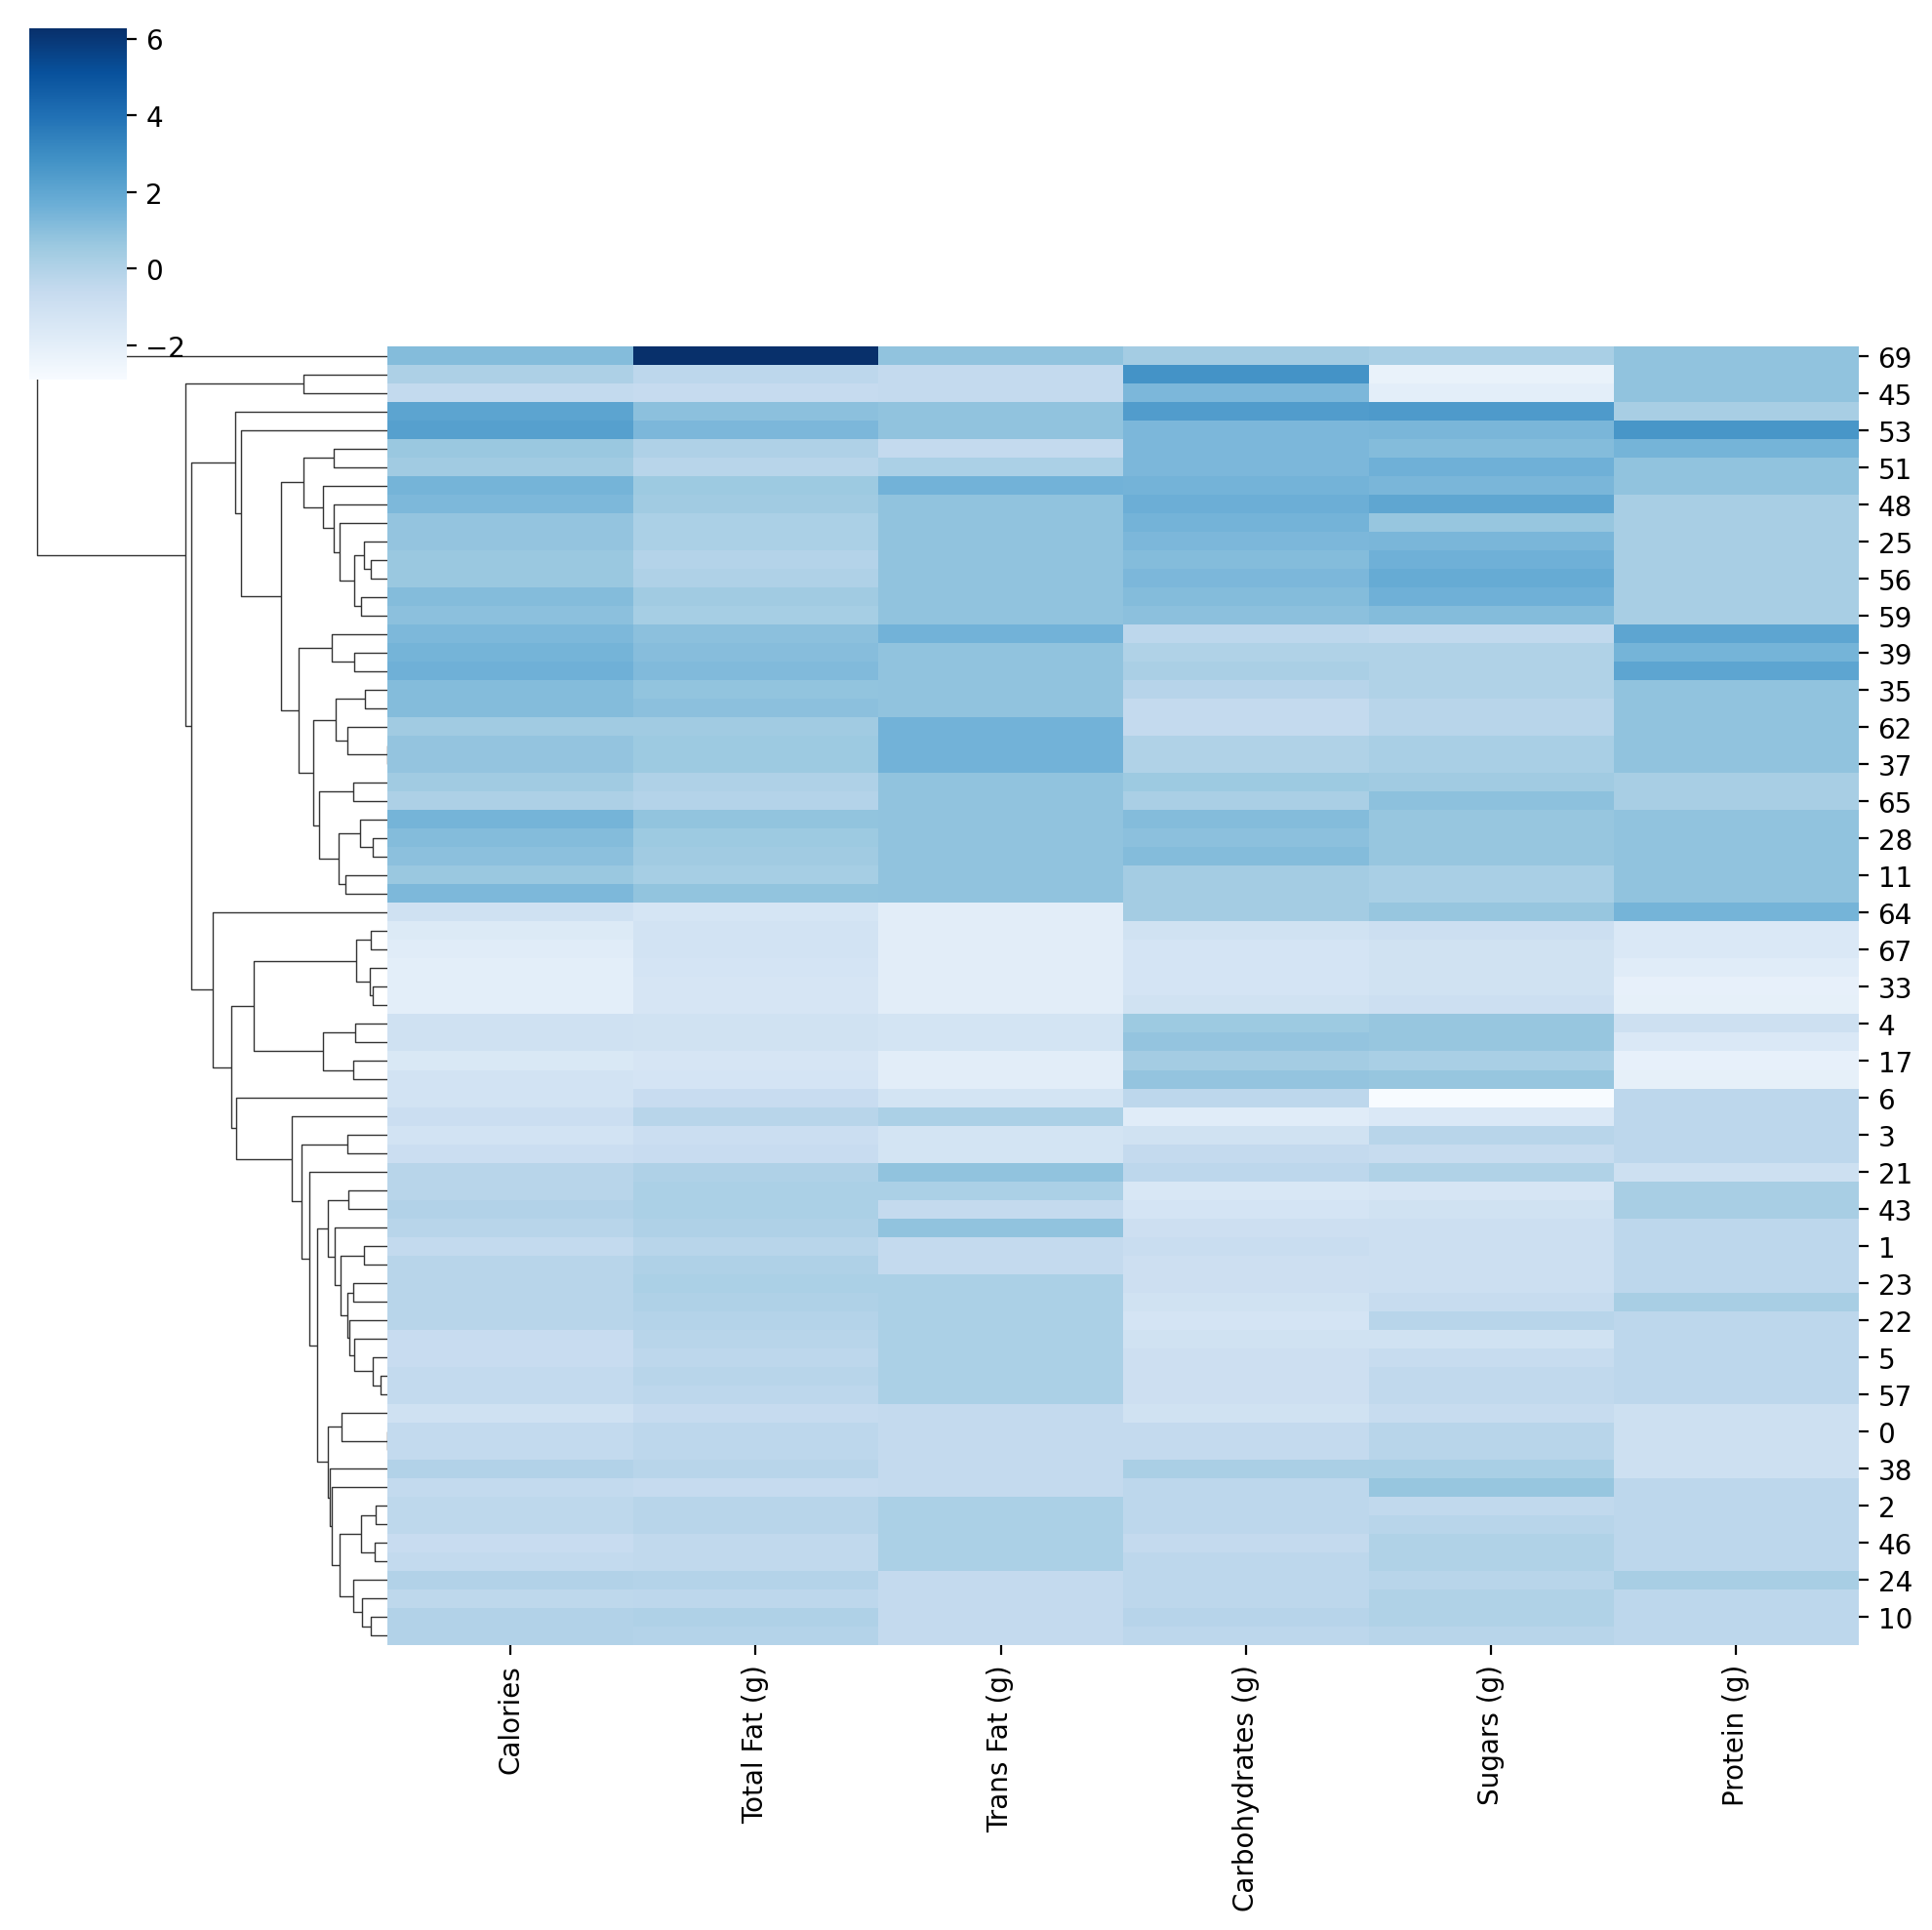

In [12]:
# doc: https://seaborn.pydata.org/generated/seaborn.clustermap.html
sns.clustermap(X, col_cluster=False, cmap="Blues")

In [13]:
hc=AgglomerativeClustering(n_clusters=2, linkage='ward')
hc

AgglomerativeClustering()

In [14]:
hc.fit(X)

AgglomerativeClustering()

In [15]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1])

In [16]:
df['cluster']=hc.labels_
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0


In [17]:
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
46,Pink Bubble Gum,150,7.0,0.3,20,17,3.0,0
62,Vanilla,220,14.0,0.5,20,16,5.0,1
37,Mint Chocolate Chip,240,15.0,0.5,23,18,5.0,1
51,Raspberry Cheese Louise,220,9.0,0.3,30,24,5.0,1
18,Cookies ‘n Cake,190,10.0,0.2,21,16,3.0,0
14,Chocolate Fudge,150,9.0,0.3,17,12,3.0,0
23,Fudge Brownie,180,12.0,0.3,18,13,3.0,0
53,Reese® NHL® Power Play,330,21.0,0.4,30,23,8.0,1
47,Pistachio Almond,270,18.0,0.5,21,15,7.0,1
25,Gold Medal Ribbon,240,12.0,0.4,30,23,4.0,1


In [18]:
df.groupby('cluster').agg(['count', 'mean', 'median']).T

<ipython-input-18-e87bc7d654f2>:1: FutureWarning: ['Flavour'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('cluster').agg(['count', 'mean', 'median']).T


cluster                            0           1
Calories          count    42.000000   28.000000
                  mean    149.761905  254.642857
                  median  160.000000  255.000000
Total Fat (g)     count    42.000000   28.000000
                  mean      6.819048   16.178571
                  median    8.000000   14.500000
Trans Fat (g)     count    42.000000   28.000000
                  mean      0.190476    0.407143
                  median    0.200000    0.400000
Carbohydrates (g) count    42.000000   28.000000
                  mean     20.238095   26.892857
                  median   20.000000   28.000000
Sugars (g)        count    42.000000   28.000000
                  mean     14.571429   20.428571
                  median   15.000000   20.000000
Protein (g)       count    42.000000   28.000000
                  mean      2.635714    4.964286
                  median    3.000000    5.000000

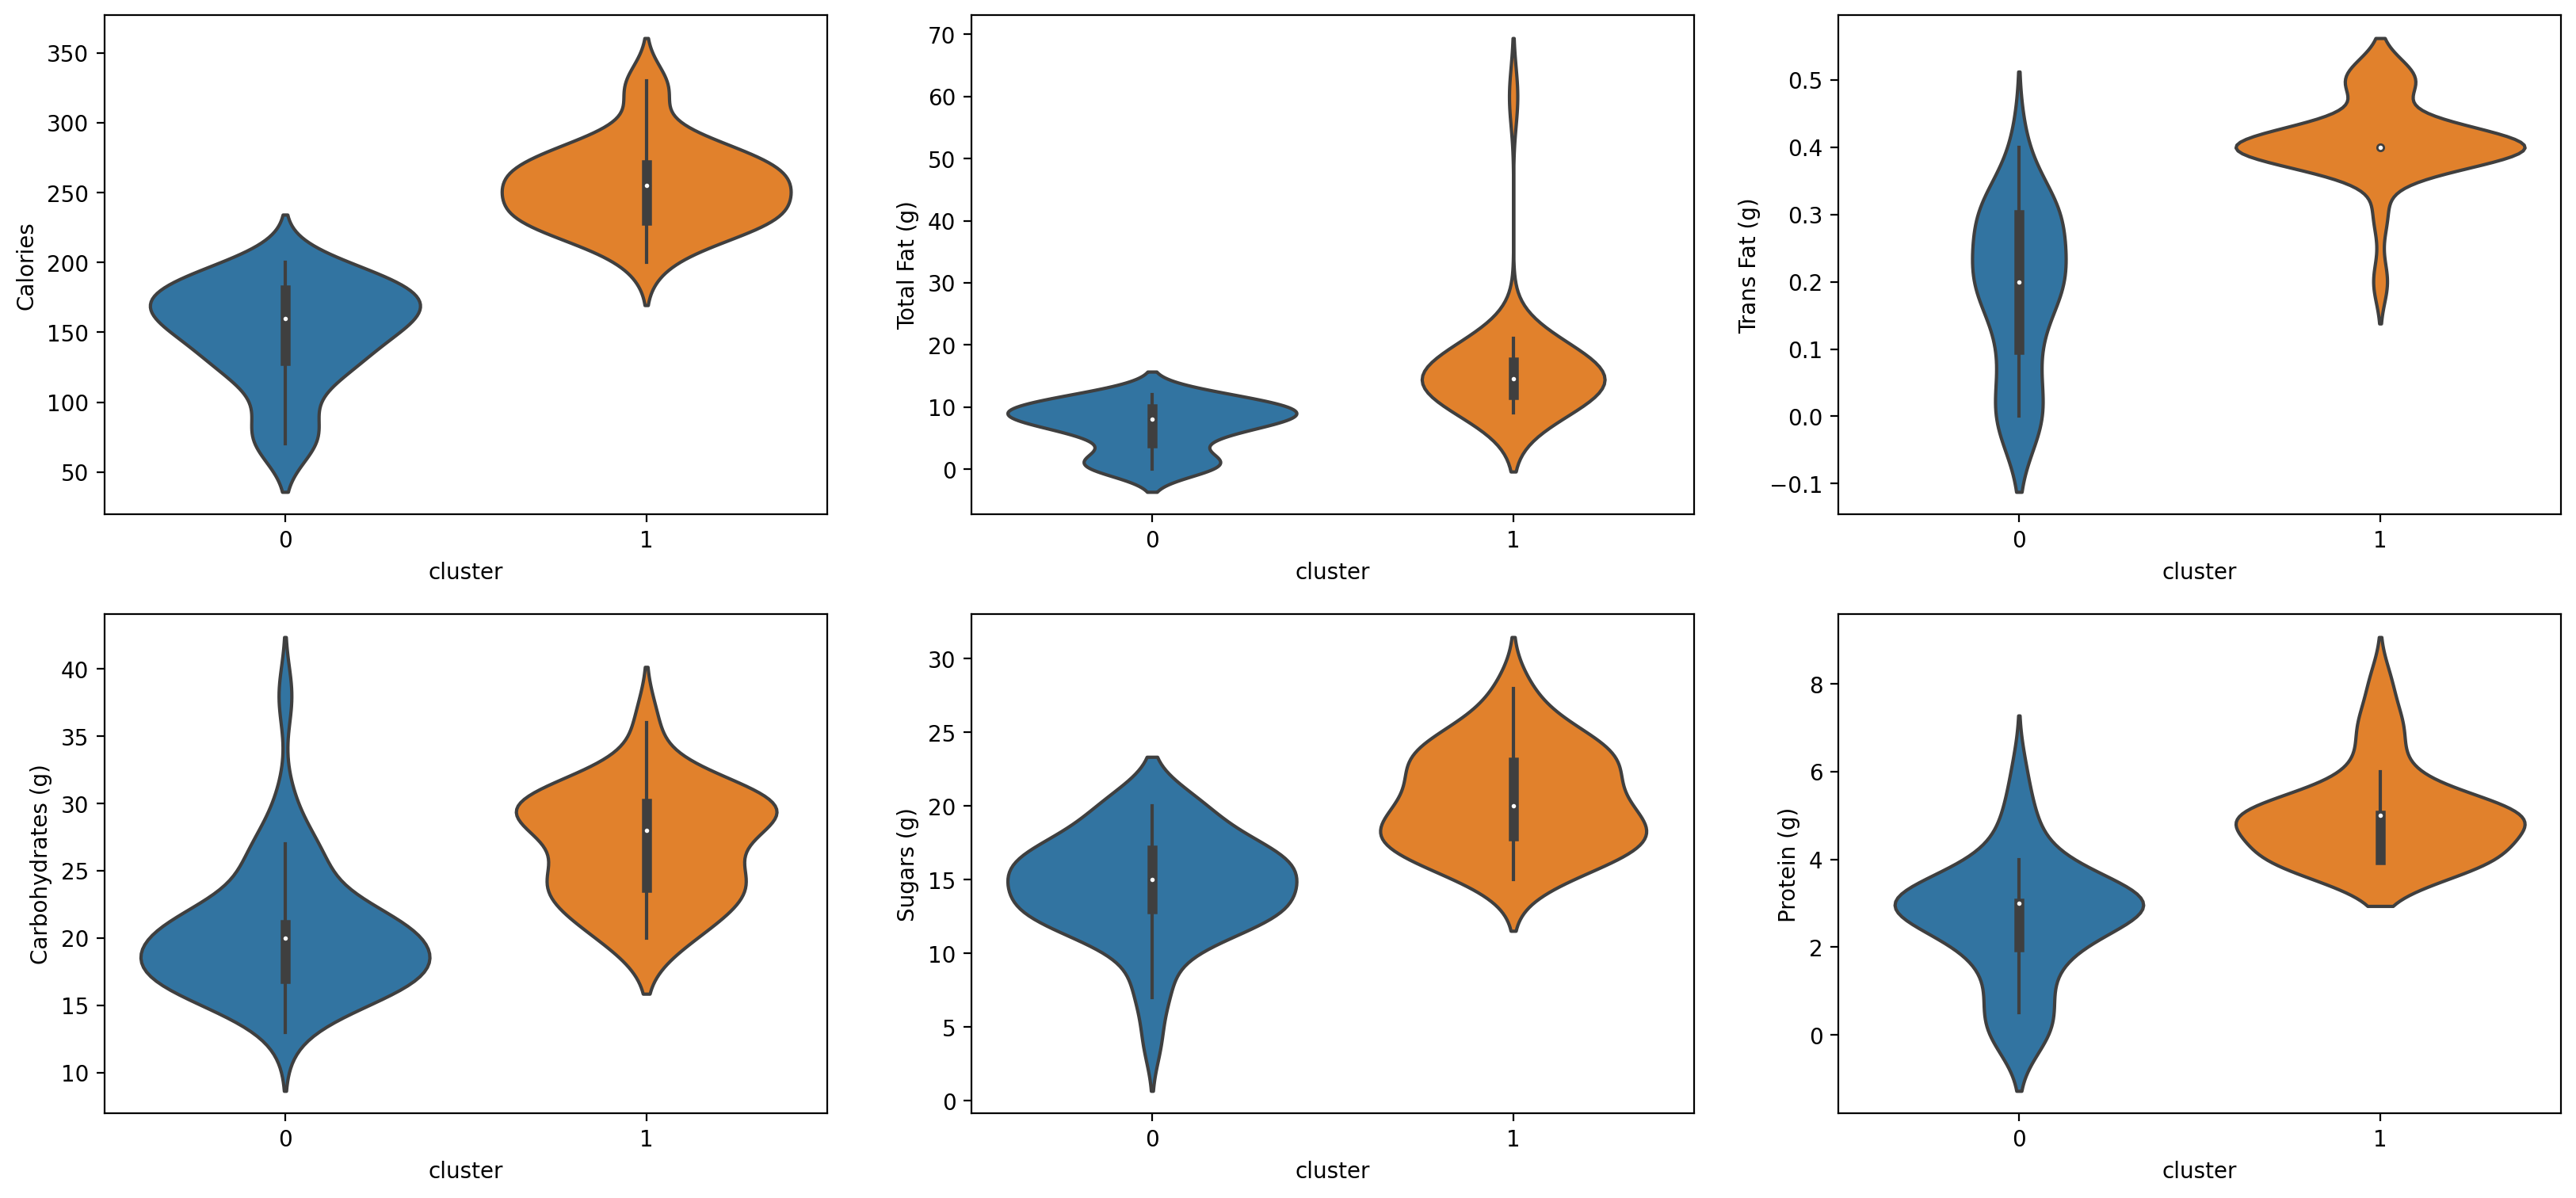

In [19]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])

In [20]:
dx=X
dx['cluster']=hc.labels_

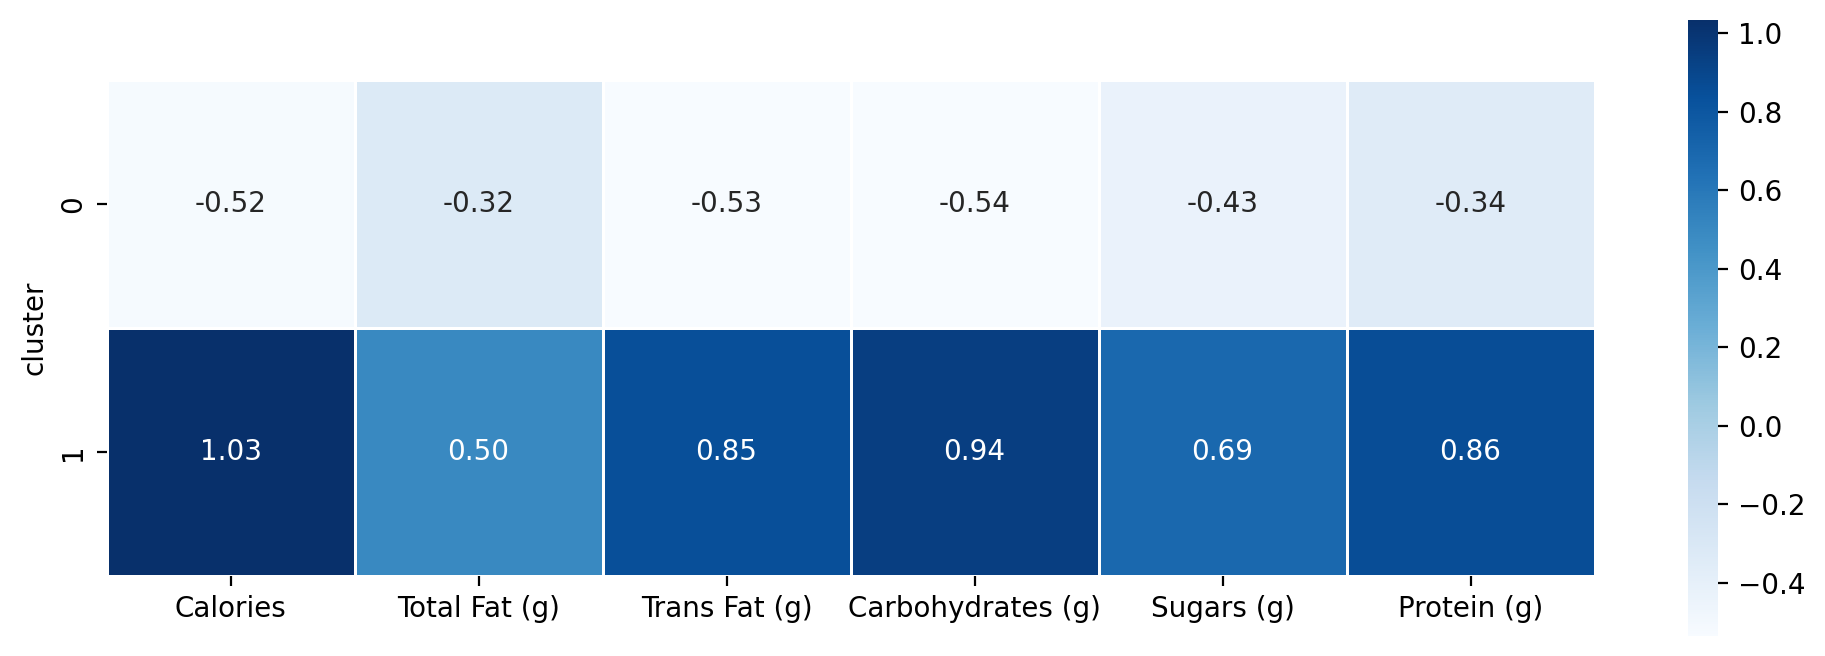

In [21]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dx[cols].groupby('cluster').median(), cmap="Blues", linewidths=1,
            square=True, annot=True, fmt='.2f', ax=ax);

In [22]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
11,Chocolate,230,13.0,0.4,25,18,5.0,1
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1


---

# Scikit-learn: KMeans Clustering

In [23]:
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters=2)
model
# X=df[cols]

KMeans(n_clusters=2)

In [25]:
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [26]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int32)

In [27]:
df['cluster_kmeans']=model.labels_

In [28]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,cluster_kmeans
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0,0
